In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=50

In [2]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

In [3]:
# sean's residual checker
def checkresiduals(df, target, sm_model):
    # checking for our model - Homoscedasticity,  Independence of residuals
    pred_val = sm_model.fittedvalues.copy()
    true_val = df[target].values.copy()
    residual = true_val - pred_val

    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    # fig, ax = plt.subplots(figsize=(8, 6))
    ax1.hist(residual, density=True, bins=30)
    ax2.scatter(df[target],residual)
    
    ax1.set_title('Residual Distribution')
    ax1.set_xlabel('Frequency')
    ax1.set_ylabel('Residuals')
    
    ax2.set_title('Residual Scatterplot')
    ax2.set_xlabel('Actual Primary School Completion Rate')
    ax2.set_ylabel('Residual')
    plt.show()

# Loading Data

In [4]:
data = pickle.load(open('Data/data.pickle','rb'))
data.columns = ['country_name', 'avg_primary_school_completion',
       'avg_female_child_emp',
       'avg_male_child_emp', 'avg_gdp_on_ed',
       'avg_pop_density', 'avg_urban_pop', 'agricultural_land',
       'gini_index', 'ed_to_military_ratio', 'adolescent_birth_rate',
       'improved_sanitation_total', 'immunization_avg', 'father_support',
       'region', 'income_gp', 'high_income', 'low_income',
       'lower_middle_income', 'upper_middle_income', 'eap',
       'eca', 'lac',
       'mena', 'na', 'sa',
       'ssa', 'relative_country_income']

In [5]:
data.head() # non-standardized data

,country_name,avg_primary_school_completion,avg_female_child_emp,avg_male_child_emp,avg_gdp_on_ed,avg_pop_density,avg_urban_pop,agricultural_land,gini_index,ed_to_military_ratio,adolescent_birth_rate,improved_sanitation_total,immunization_avg,father_support,region,income_gp,high_income,low_income,lower_middle_income,upper_middle_income,eap,eca,lac,mena,na,sa,ssa,relative_country_income
1,Angola,41.000475,30.100000,30.000000,NaN,18.382628,58.639895,46.671448,47.350000,0.827895,190.9,52.0,73.000,NaN,Sub-Saharan Africa,Lower middle income,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,Albania,97.193730,18.414440,24.173033,29.845680,107.789280,51.027526,42.261679,30.325000,NaN,17.6,93.0,86.000,52.8,Europe & Central Asia,Upper middle income,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
3,United Arab Emirates,91.408940,NaN,NaN,NaN,97.491177,83.603789,6.716998,NaN,NaN,34.2,98.0,89.250,NaN,Middle East & North Africa,High income,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
4,Argentina,101.405976,6.643352,11.047324,13.124827,14.823043,90.614737,51.637240,45.770588,6.862963,69.6,96.0,82.000,56.7,Latin America & Caribbean,Upper middle income,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
5,Armenia,95.185489,7.500000,12.000000,10.983123,103.612610,63.624895,56.680303,32.023529,0.562925,22.7,89.0,82.375,NaN,Europe & Central Asia,Upper middle income,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2


In [6]:
# standardizing the data
features = ['avg_pop_density', 'avg_urban_pop','agricultural_land', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg']
data2 = data.copy()
scalar = StandardScaler()
scalar.fit(data2[features])
scaled_features=scalar.transform(data2[features])
scaled_data = pd.DataFrame(scaled_features,columns=features,index=data2.index)
scaled_data['avg_primary_school_completion'] = data2['avg_primary_school_completion']
scaled_data['country_name'] = data2['country_name']
scaled_data['income_gp'] = data2['income_gp']
scaled_data['relative_country_income']=data2['relative_country_income']
scaled_data['region']=data2['region']
scaled_data = scaled_data.dropna()
scaled_data.head()

,avg_pop_density,avg_urban_pop,agricultural_land,adolescent_birth_rate,improved_sanitation_total,immunization_avg,avg_primary_school_completion,country_name,income_gp,relative_country_income,region
1,-0.185898,0.119534,0.329126,2.772705,-0.730386,-0.068527,41.000475,Angola,Lower middle income,1,Sub-Saharan Africa
2,-0.120297,-0.209186,0.124904,-0.814251,0.686609,0.864858,97.193730,Albania,Upper middle income,2,Europe & Central Asia
3,-0.127853,1.197532,-1.521216,-0.470665,0.859413,1.098205,91.408940,United Arab Emirates,High income,3,Middle East & North Africa
4,-0.188510,1.500281,0.559098,0.262043,0.790291,0.577663,101.405976,Argentina,Upper middle income,2,Latin America & Caribbean
5,-0.123362,0.334798,0.792649,-0.708692,0.548365,0.604587,95.185489,Armenia,Upper middle income,2,Europe & Central Asia


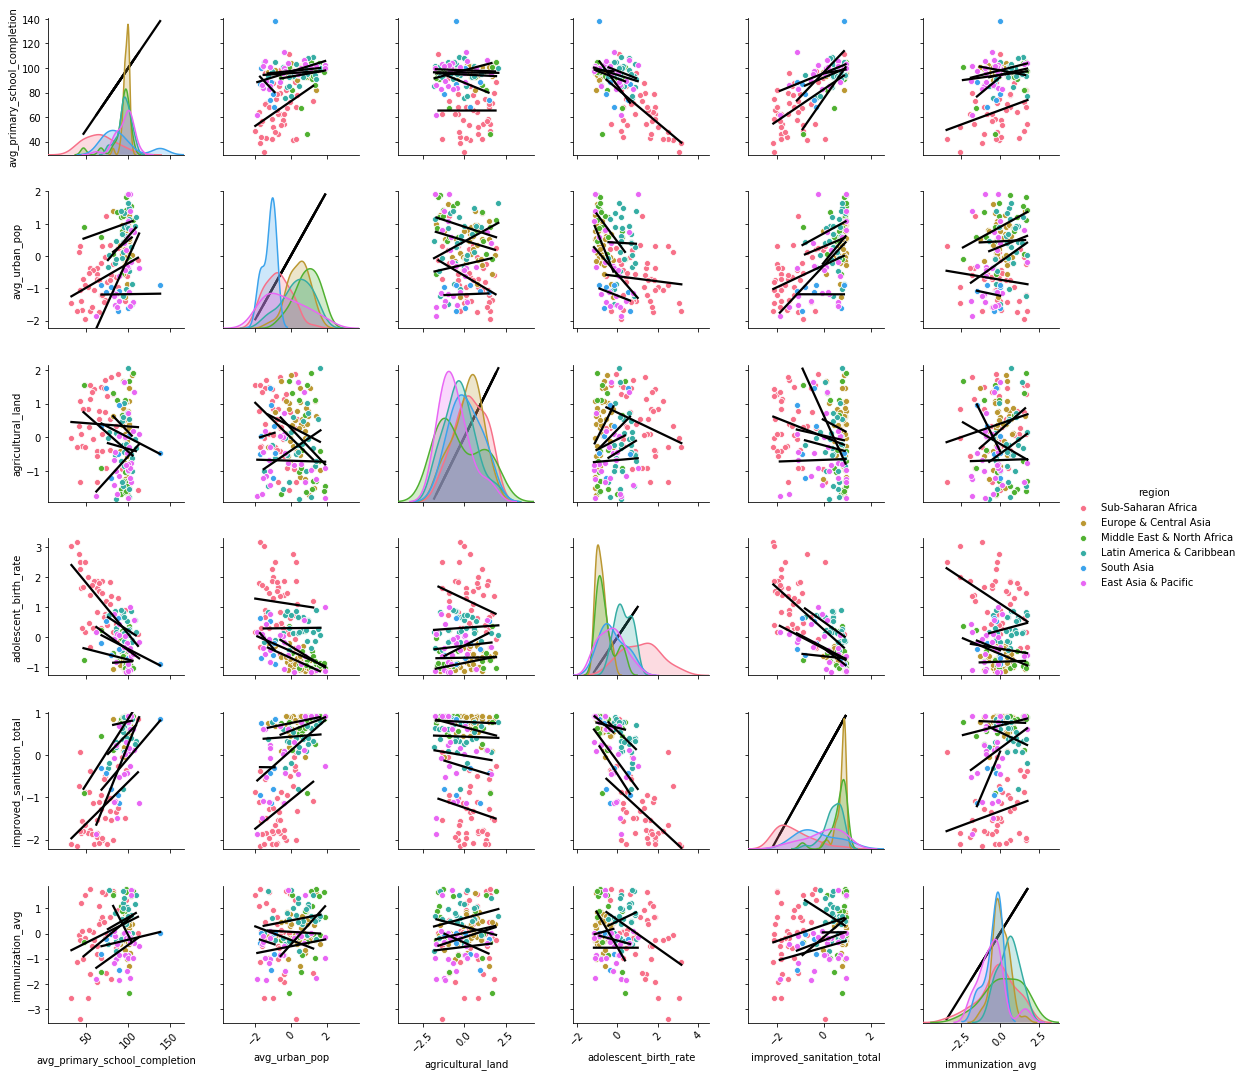

In [11]:
g = sns.pairplot(vars=["avg_primary_school_completion",
                       "avg_urban_pop",
                       "agricultural_land", "adolescent_birth_rate",
                       "improved_sanitation_total","immunization_avg"],
                       hue='region', palette='husl',
                       data=scaled_data[~scaled_data['region'].isin(['North America'])])
g.map(sns.regplot,truncate=True,ci=None,color='black',scatter=False,robust=True)
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
    ax.autoscale(enable=True, tight=True)

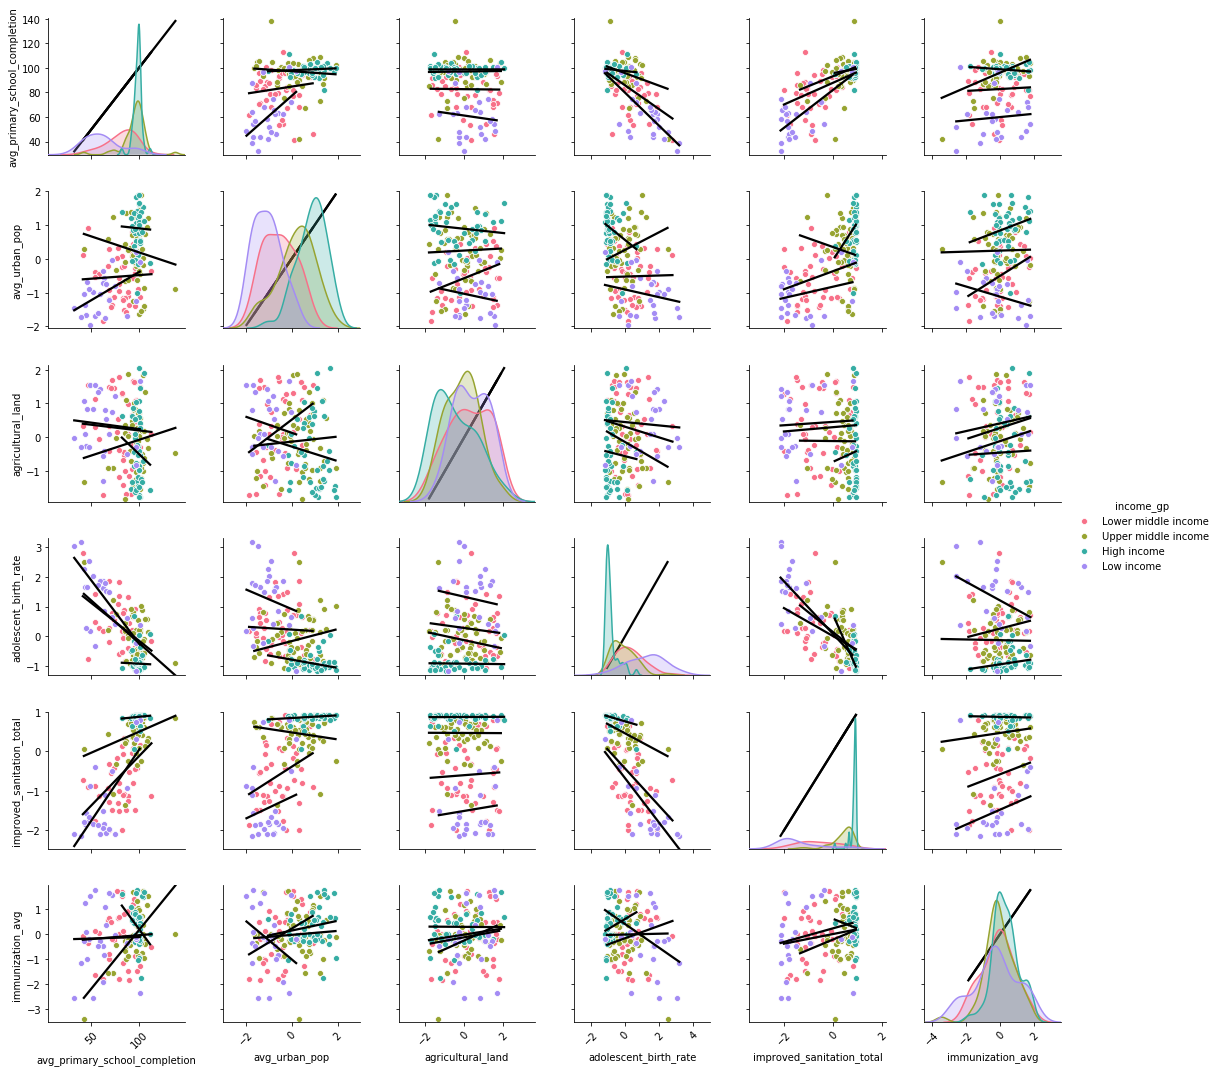

In [10]:
g = sns.pairplot(vars=["avg_primary_school_completion",
                       "avg_urban_pop",
                       "agricultural_land", "adolescent_birth_rate",
                       "improved_sanitation_total","immunization_avg"],
                       hue='income_gp', palette='husl',
                       data=scaled_data)
g.map(sns.regplot,truncate=True,ci=None,color='black',scatter=False,robust=True)
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
    ax.autoscale(enable=True, tight=True)

# Models

## First Model

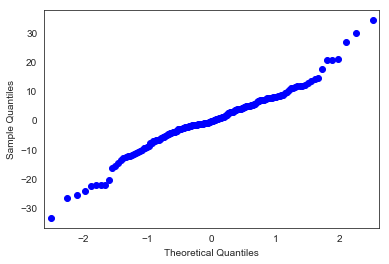

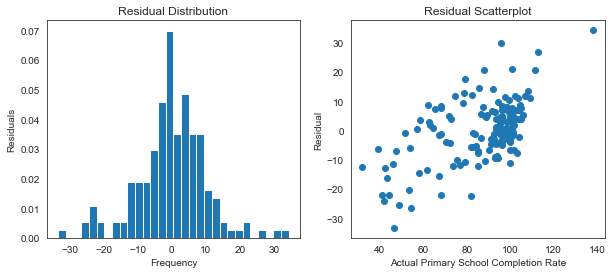

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     avg_primary_school_completion   R-squared:                       0.693
Model:                                       OLS   Adj. R-squared:                  0.666
Method:                            Least Squares   F-statistic:                     26.16
Date:                           Fri, 23 Aug 2019   Prob (F-statistic):           2.73e-32
Time:                                   14:10:14   Log-Likelihood:                -615.64
No. Observations:                            165   AIC:                             1259.
Df Residuals:                                151   BIC:                             1303.
Df Model:                                     13                                         
Covariance Type:                       nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               92.4598      3.381     27.349      0.000      85.780      99.139
region[T.Europe & Central Asia]         -9.4332      3.182     -2.964      0.004     -15.720      -3.146
region[T.Latin America & Caribbean]     -3.5407      3.626     -0.977      0.330     -10.704       3.623
region[T.Middle East & North Africa]   -13.3548      3.663     -3.646      0.000     -20.591      -6.118
region[T.North America]                -13.8065     11.011     -1.254      0.212     -35.563       7.950
region[T.South Asia]                    -0.9034      4.667     -0.194      0.847     -10.124       8.317
region[T.Sub-Saharan Africa]           -12.2644      3.736     -3.283      0.001     -19.646      -4.883
avg_pop_density                         -1.3315      2.106     -0.632      0.528      -5.493       2.830
avg_urban_pop                            1.0693      1.321      0.809      0.420      -1.542       3.680
agricultural_land                        0.3344      0.928      0.360      0.719      -1.499       2.168
adolescent_birth_rate                   -5.1604      1.707     -3.024      0.003      -8.532      -1.788
improved_sanitation_total                6.9785      1.847      3.778      0.000       3.329      10.628
immunization_avg                         1.5695      0.971      1.616      0.108      -0.350       3.489
relative_country_income                  1.8889      1.603      1.178      0.240      -1.278       5.056
==============================================================================
Omnibus:                        8.906   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               17.459
Skew:                          -0.116   Prob(JB):                     0.000162
Kurtosis:                       4.577   Cond. No.                         31.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
features= ['avg_pop_density','avg_urban_pop','agricultural_land', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg', 'relative_country_income', 'region']

model_first= ols(formula="avg_primary_school_completion~"+'+'.join(features), data=scaled_data).fit()
sm.qqplot(model_first.resid)
checkresiduals(scaled_data[features+['avg_primary_school_completion']].dropna(), 'avg_primary_school_completion', model_first)
model_first.summary()

### Model without interactions

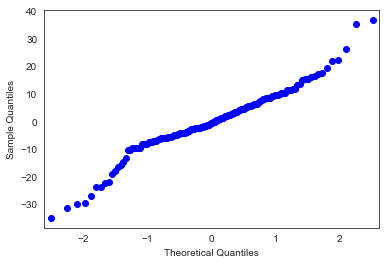

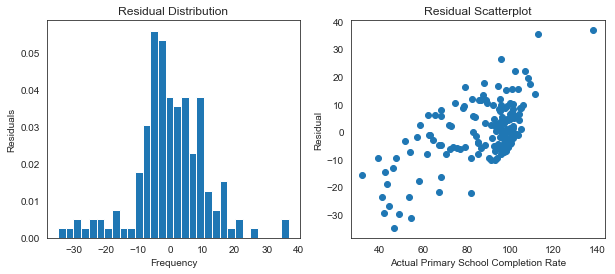

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     avg_primary_school_completion   R-squared:                       0.632
Model:                                       OLS   Adj. R-squared:                  0.618
Method:                            Least Squares   F-statistic:                     45.23
Date:                           Fri, 23 Aug 2019   Prob (F-statistic):           6.59e-32
Time:                                   14:10:26   Log-Likelihood:                -630.46
No. Observations:                            165   AIC:                             1275.
Df Residuals:                                158   BIC:                             1297.
Df Model:                                      6                                         
Covariance Type:                       nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    84.6178      2.894     29.236      0.000      78.901      90.334
avg_urban_pop                -0.5535      1.264     -0.438      0.662      -3.049       1.942
agricultural_land            -0.6165      0.925     -0.666      0.506      -2.444       1.211
adolescent_birth_rate        -5.5623      1.409     -3.946      0.000      -8.346      -2.778
improved_sanitation_total     8.3245      1.687      4.934      0.000       4.992      11.657
immunization_avg              1.2301      0.952      1.292      0.198      -0.650       3.110
relative_country_income       1.9333      1.615      1.197      0.233      -1.257       5.123
==============================================================================
Omnibus:                        9.889   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               20.437
Skew:                          -0.145   Prob(JB):                     3.65e-05
Kurtosis:                       4.700   Cond. No.                         8.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
features= ['avg_urban_pop','agricultural_land', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg', 'relative_country_income']

model_wo_interaction= ols(formula="avg_primary_school_completion~"+'+'.join(features), data=scaled_data).fit()
sm.qqplot(model_wo_interaction.resid)
checkresiduals(scaled_data[features+['avg_primary_school_completion']].dropna(), 'avg_primary_school_completion', model_wo_interaction)
model_wo_interaction.summary()

## Creating Interaction Terms
### Incorrect values when creating interaction terms
So, when you want to do interaction terms AND scale data, always calculate your interaction terms BEFORE you scale your data!!

When you scale the variables and THEN interact them, it's like you're scaling the interaction twice, since it's the product of two scaled variables. 

ie, $f(v_1)\cdot f(v_2) = f^2(v_1\cdot v_2)$, when it _should_ be $f(v_1\cdot v_2)$

In [40]:
# standardizing the data again with interation terms
features = ['avg_pop_density', 'avg_urban_pop','agricultural_land', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg','low_income','li_aup','al_ia','san_imm']
data2 = data.copy()
data2['li_aup']=data2['low_income']*data2['avg_urban_pop']
data2['al_ia']=data2['agricultural_land']*data2['immunization_avg']
data2['san_imm']=data2['improved_sanitation_total']*data2['immunization_avg']
scalar = StandardScaler()
scalar.fit(data2[features])
scaled_features=scalar.transform(data2[features])
scaled_interactions = pd.DataFrame(scaled_features,columns=features,index=data2.index)
scaled_interactions['avg_primary_school_completion'] = data2['avg_primary_school_completion']
scaled_interactions['country_name'] = data2['country_name']
scaled_interactions['income_gp'] = data2['income_gp']
scaled_interactions['relative_country_income']=data2['relative_country_income']
scaled_interactions['region']=data2['region']
scaled_interactions = scaled_interactions.dropna()
cols = scaled_interactions.columns.tolist()
cols = cols[11:12]+cols[10:11]+cols[0:10]+cols[12:]
scaled_interactions = scaled_interactions[cols]
scaled_interactions.head()

,country_name,avg_primary_school_completion,avg_pop_density,avg_urban_pop,agricultural_land,adolescent_birth_rate,improved_sanitation_total,immunization_avg,low_income,li_aup,al_ia,san_imm,income_gp,relative_country_income,region
1,Angola,41.000475,-0.185898,0.119534,0.329126,2.772705,-0.730386,-0.068527,-0.436101,-0.400049,0.262423,-0.698658,Lower middle income,1,Sub-Saharan Africa
2,Albania,97.193730,-0.120297,-0.209186,0.124904,-0.814251,0.686609,0.864858,-0.436101,-0.400049,0.394343,0.987447,Upper middle income,2,Europe & Central Asia
3,United Arab Emirates,91.408940,-0.127853,1.197532,-1.521216,-0.470665,0.859413,1.098205,-0.436101,-0.400049,-1.365651,1.287792,High income,3,Middle East & North Africa
4,Argentina,101.405976,-0.188510,1.500281,0.559098,0.262043,0.790291,0.577663,-0.436101,-0.400049,0.742136,0.936888,Upper middle income,2,Latin America & Caribbean
5,Armenia,95.185489,-0.123362,0.334798,0.792649,-0.708692,0.548365,0.604587,-0.436101,-0.400049,0.994267,0.719955,Upper middle income,2,Europe & Central Asia


### Income • Average Urban Population
Our hypothesis with 95% confidence is:

H<sub>0</sub> : `Income does not affect the Average Urban Population and Primary School Completion relationship`

H<sub>a</sub> : `Income does affect the Average Urban Population and Primary School Completion relationship`

Low income is the only income group with a significant p-value, so we can reject the null hypothesis for low income.
All the other income groups have insignificant p-values, so we fail to reject the null hypothesis for them.

Interaction term: $$LI \cdot AUP$$
(LI = Low Income, AUP= Average Urban Population)

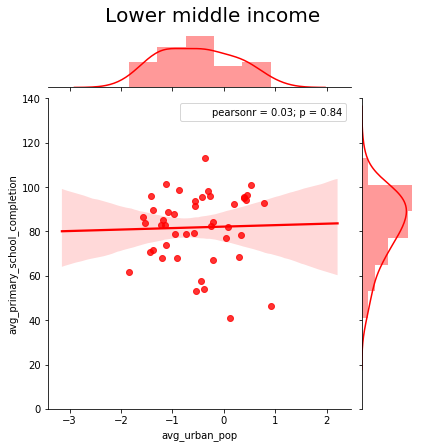

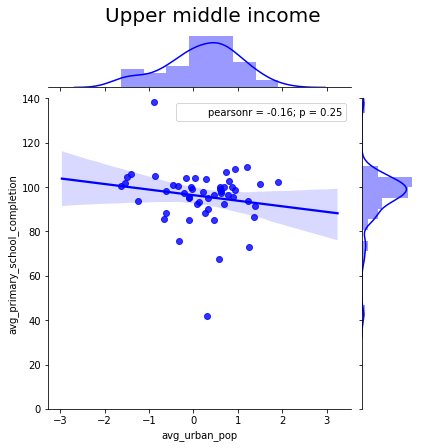

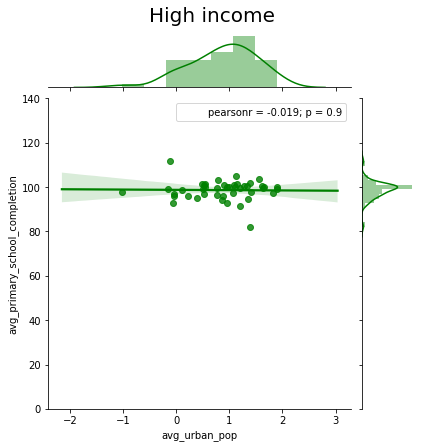

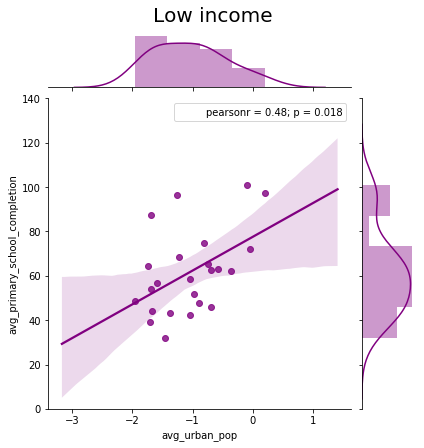

In [28]:
colors = ['red','blue','green','purple']
for group in list(zip(scaled_interactions['income_gp'].unique(),colors)):
    plots = sns.jointplot(x='avg_urban_pop',
                  y='avg_primary_school_completion',
                  data=scaled_interactions[scaled_interactions['income_gp']==group[0]],
                  color=group[1], label=group[0], kind='reg',
                  ylim=(0,140))
    plots.fig.suptitle(group[0],y=1.03,fontsize=20)
    plots.annotate(stats.pearsonr)

### Agricultural Land • Immunization Average
Our hypothesis with 95% confidence is:

H<sub>0</sub> : `Immunization Averages has no effect on Agricultural Land and Primary School Completion relationship`

H<sub>a</sub> : `Immunization Averages has an effect on Agricultural Land and Primary School Completion relationship`

This interaction was not as apparent, but we can still see that Low Immunization Average has an insignificant p-value, so we fail to reject the null hypothesis. While High Immunization Average has a significant p-value so we can conclude that there is extra information in this interaction. (High and Low defined as above and below the mean of our sample respectively.)

Interaction term: $$AL \cdot IA$$
(AL = Agricultural Land, IA= Immunization Average)

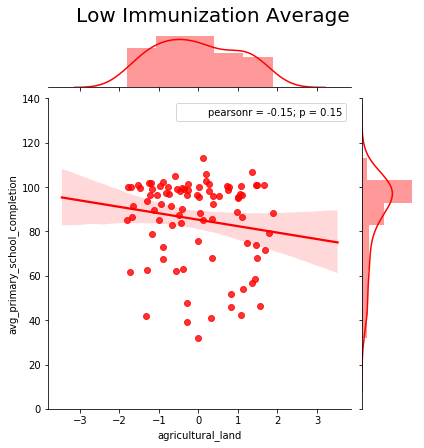

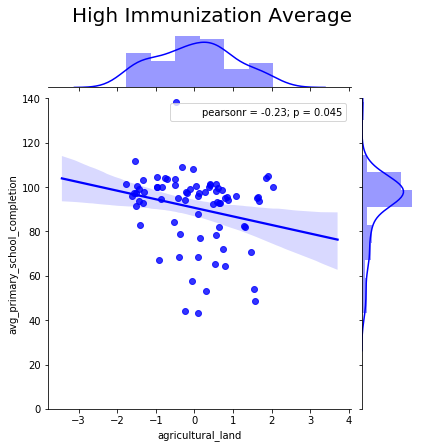

In [32]:
plots = sns.jointplot(x='agricultural_land',
              y='avg_primary_school_completion',
              data=scaled_interactions[scaled_interactions['immunization_avg']<=0],
              color='red', kind='reg',
              ylim=(0,140))
plots.fig.suptitle('Low Immunization Average',y=1.03,fontsize=20)
plots.annotate(stats.pearsonr)

plots = sns.jointplot(x='agricultural_land',
              y='avg_primary_school_completion',
              data=scaled_interactions[scaled_interactions['immunization_avg']>=0],
              color='blue', kind='reg',
              ylim=(0,140))
plots.fig.suptitle('High Immunization Average',y=1.03,fontsize=20)
plots.annotate(stats.pearsonr)

### Bad Interaction Term
Our hypothesis with 95% confidence is:

H<sub>0</sub> : `Immunization Averages has no effect on Sanitation and Primary School Completion relationship`

H<sub>a</sub> : `Immunization Averages has an effect on Sanitation and Primary School Completion relationship`

This is a bad interaction term since it does not provide us any addition information. This is backed by the fact that both low immunization and high immunization have low p-values and reject the null hypothesis. Therefore we can conclude that immunization averages and sanitation do not interact.

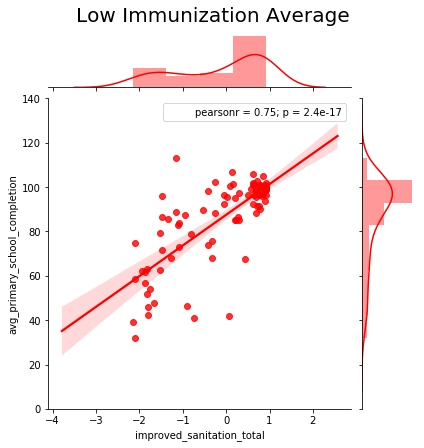

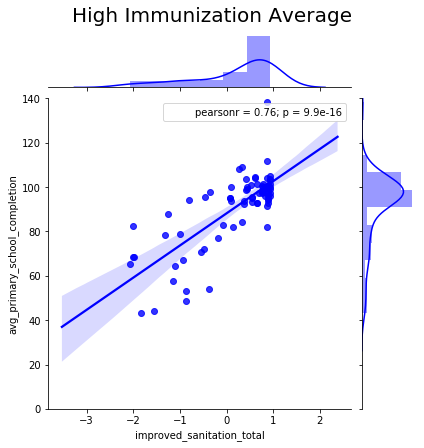

In [33]:
plots = sns.jointplot(x='improved_sanitation_total',
              y='avg_primary_school_completion',
              data=scaled_interactions[scaled_interactions['immunization_avg']<=0],
              color='red', kind='reg',
              ylim=(0,140))
plots.fig.suptitle('Low Immunization Average',y=1.03,fontsize=20)
plots.annotate(stats.pearsonr)

plots = sns.jointplot(x='improved_sanitation_total',
              y='avg_primary_school_completion',
              data=scaled_interactions[scaled_interactions['immunization_avg']>=0],
              color='blue', kind='reg',
              ylim=(0,140))
plots.fig.suptitle('High Immunization Average',y=1.03,fontsize=20)
plots.annotate(stats.pearsonr)


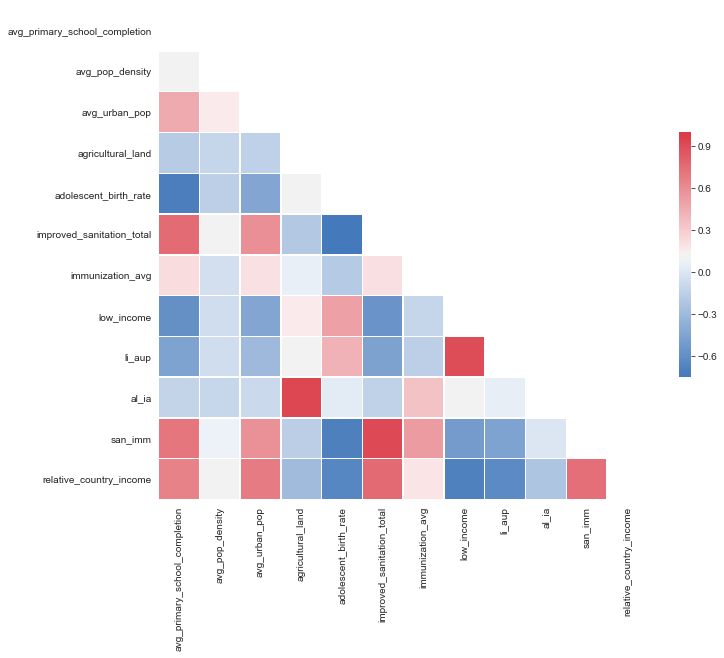

In [41]:
corr = scaled_interactions.corr()
CorrMtx(corr,dropDuplicates=True)

# Final Model

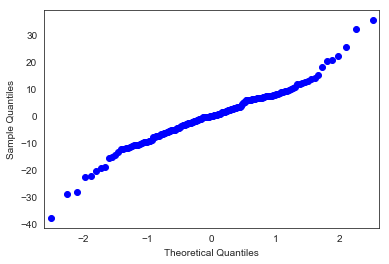

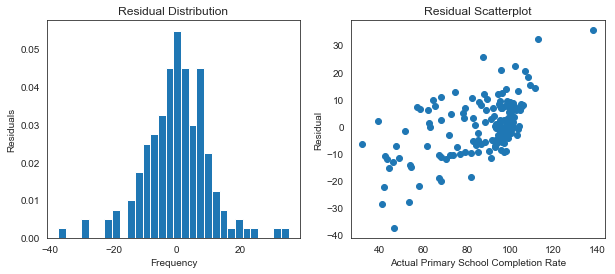

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     avg_primary_school_completion   R-squared:                       0.688
Model:                                       OLS   Adj. R-squared:                  0.672
Method:                            Least Squares   F-statistic:                     42.91
Date:                           Fri, 23 Aug 2019   Prob (F-statistic):           1.10e-35
Time:                                   14:11:52   Log-Likelihood:                -616.96
No. Observations:                            165   AIC:                             1252.
Df Residuals:                                156   BIC:                             1280.
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    87.6677      0.818    107.224      0.000      86.053      89.283
avg_urban_pop                -1.5156      1.095     -1.385      0.168      -3.678       0.646
agricultural_land             8.3424      4.232      1.971      0.050      -0.017      16.702
adolescent_birth_rate        -4.9168      1.298     -3.788      0.000      -7.481      -2.353
improved_sanitation_total     8.0647      1.466      5.500      0.000       5.168      10.961
immunization_avg              4.9752      1.672      2.976      0.003       1.673       8.277
low_income                  -10.0470      2.336     -4.302      0.000     -14.660      -5.434
li_aup                        6.2117      2.147      2.893      0.004       1.970      10.453
al_ia                        -9.7128      4.493     -2.162      0.032     -18.588      -0.837
==============================================================================
Omnibus:                       11.176   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               27.134
Skew:                          -0.082   Prob(JB):                     1.28e-06
Kurtosis:                       4.980   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
features= ['avg_urban_pop','agricultural_land', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg', 'low_income', 'li_aup', 'al_ia']

model_final= ols(formula="avg_primary_school_completion~"+'+'.join(features), data=scaled_interactions).fit()
sm.qqplot(model_final.resid)
checkresiduals(scaled_interactions[features+['avg_primary_school_completion']].dropna(), 'avg_primary_school_completion', model_final)
model_final.summary()